# Dataset and Visualization Exercises


## Dataset: [World Happiness Report (Kaggle)](https://www.kaggle.com/datasets/unsdsn/world-happiness)

**Features include**:

* Country
* Region
* Happiness Score
* GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity
* Perceptions of corruption

---

## Exercise 1: Compare Happiness Across Regions

**Tasks**:

1. Create a boxplot showing the distribution of **Happiness Score** across different **regions**.
2. Use a violin plot to show the **distribution shape** within each region.
3. Identify which regions have the **highest variability** in happiness scores.

**Key concepts**: Category-based comparison, distribution visualization.

---

## Exercise 2: Relationship Between Wealth and Happiness

**Tasks**:

1. Create a scatter plot with **GDP per capita** on the x-axis and **Happiness Score** on the y-axis.
2. Add a **regression line** to assess the correlation.
3. Color the points by **region** to observe any regional trends.
4. Comment on whether wealth is a good predictor of happiness based on the plot.

**Key concepts**: Correlation analysis, multivariate scatter plots, trend lines.

---

## Exercise 3: The Role of Social Factors

**Tasks**:

1. Use a pairplot to visualize relationships between the following features:

   * Social support
   * Generosity
   * Perceptions of corruption
   * Happiness Score
2. Analyze which factors show a **stronger relationship** with happiness.
3. Comment on any **outliers** or **unexpected patterns** you observe.

**Key concepts**: Multivariate analysis, pairwise relationships, exploratory data analysis.

---

## Exercise 4: Mapping Global Happiness

**Tasks**:

1. Create a **choropleth map** showing the **Happiness Score** for each **country**.
2. Use a **color gradient** to indicate different levels of happiness.
3. Identify and comment on **regional clusters** of high or low happiness.

**Key concepts**: Geospatial data visualization, choropleth maps.

---

## Exercise 5: Ranking Countries by Happiness

**Tasks**:

1. Create a **horizontal bar plot** of the **top 10 happiest countries**, sorted by Happiness Score.
2. Create another bar plot for the **bottom 10 countries**.
3. Add **annotations** to display the exact Happiness Score for each country.
4. Reflect on any **patterns** in the top vs. bottom rankings.

**Key concepts**: Sorted bar plots, data ranking, annotations.

---

## Optional Extension

1. Create a **correlation heatmap** of all numeric features.
2. Identify which factors are **most correlated** with Happiness Score.
3. Discuss any **insights** or **surprising relationships**.

**Key concepts**: Heatmaps, correlation analysis.

---

## Tools you can use:

* Python: pandas, seaborn, matplotlib, plotly
* Jupyter Notebook
* Optional: geopandas or plotly express for the choropleth

In [ ]:
# imports
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
uploaded = files.upload()

Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.README.html to ne_110m_admin_0_countries.README.html
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries (2).shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.VERSION.txt to ne_110m_admin_0_countries.VERSION.txt


In [ ]:
df = pd.read_csv('2015.csv') # carregar df com a base do Kaggle

Ex 1:

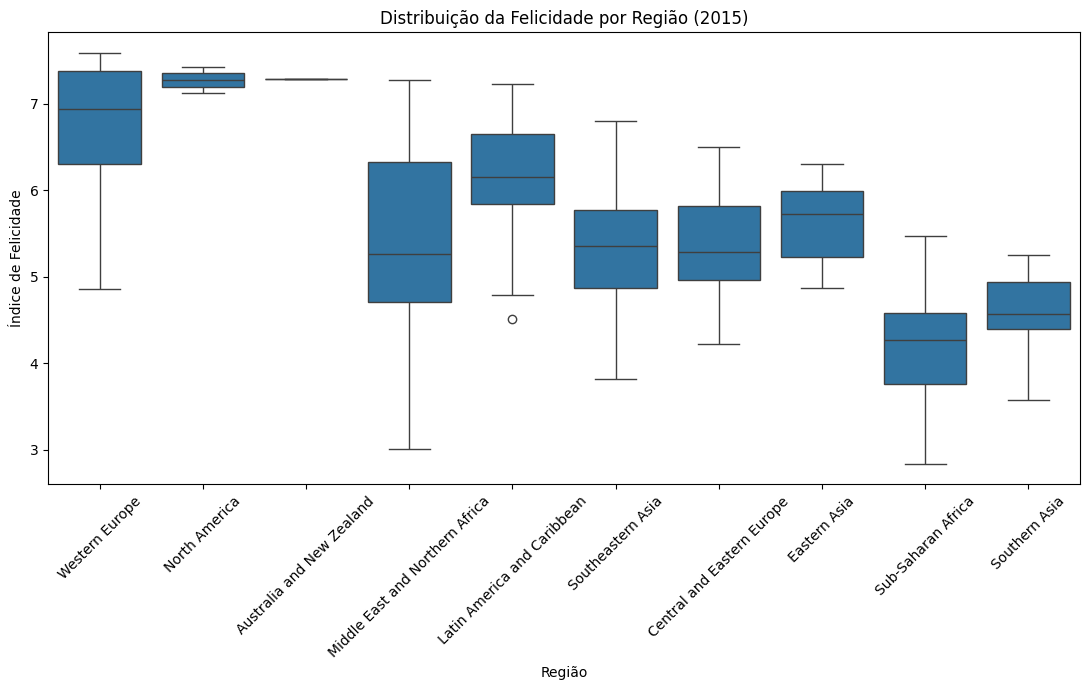

In [ ]:
#boxplot
plt.figure(figsize=(11, 7))

sns.boxplot(data=df, x='Region', y='Happiness Score')

plt.xticks(rotation=45)
plt.title('Distribuição da Felicidade por Região (2015)')
plt.xlabel('Região')
plt.ylabel('Índice de Felicidade')
plt.tight_layout()
plt.show()

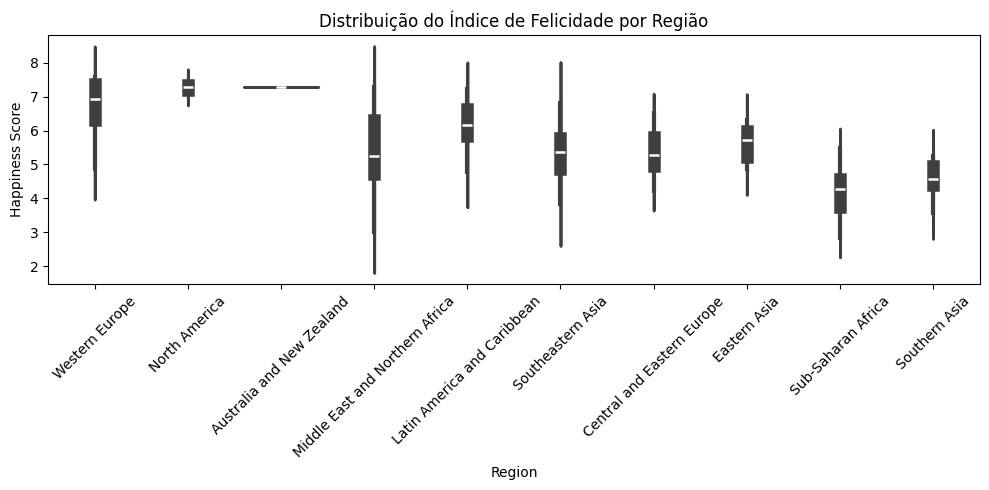

In [ ]:
#violin plot
plt.figure(figsize=(10, 5))  # Define o tamanho da figura

sns.violinplot(
    data=df,
    x='Region',
    y='Happiness Score',
    linewidth=2          # Espessura da borda do violino
)

plt.xticks(rotation=45)
plt.title('Distribuição do Índice de Felicidade por Região')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.tight_layout()  # Ajusta automaticamente os elementos da figura
plt.show()

In [ ]:
# aqui foi feita uma agregação do hapiness score por região, e em seguida tirada a média, exibida de maneira decrescente
dp = df.groupby('Region')['Happiness Score'].std().sort_values(ascending=False)

print("Variabilidade do índice de felicidade por região (desvio padrão):")
print(dp)

Variabilidade do índice de felicidade por região (desvio padrão):
Region
Middle East and Northern Africa    1.101382
Southeastern Asia                  0.950020
Western Europe                     0.824582
Latin America and Caribbean        0.728560
Sub-Saharan Africa                 0.609557
Southern Asia                      0.570526
Central and Eastern Europe         0.570446
Eastern Asia                       0.554053
North America                      0.217789
Australia and New Zealand          0.001414
Name: Happiness Score, dtype: float64


Ex 2

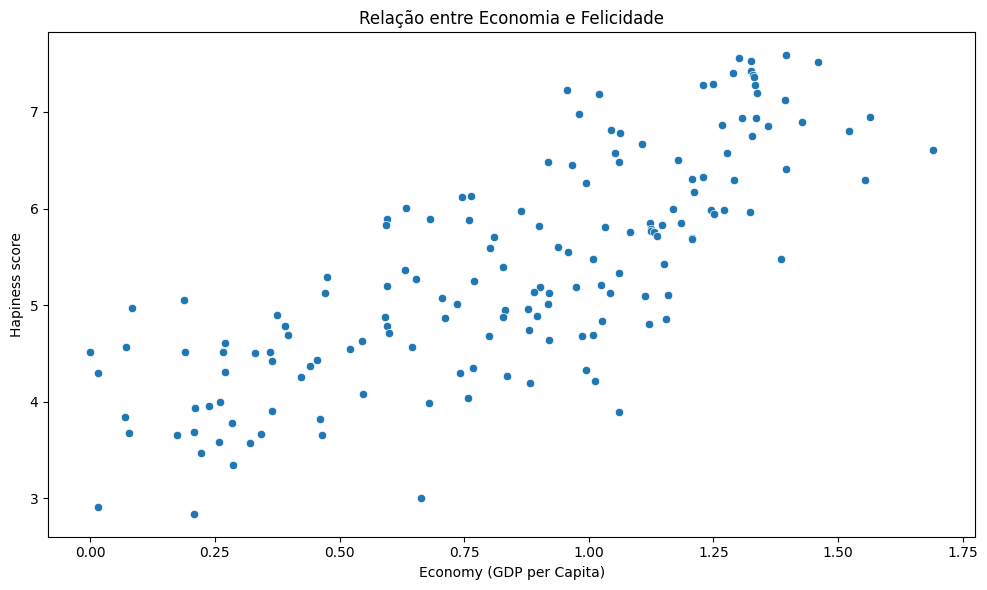

In [ ]:
# Criar scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Economy (GDP per Capita)',
    y='Happiness Score'
)

# Ajustes de visualização
plt.title('Relação entre Economia e Felicidade')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Hapiness score')
plt.tight_layout()
plt.show()

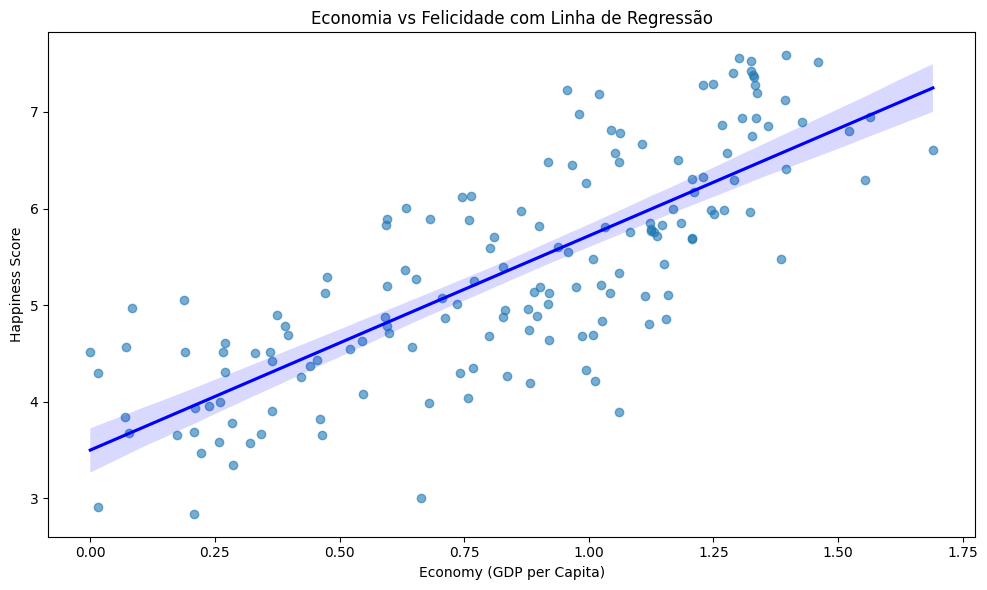

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    scatter_kws={'alpha': 0.6},   # Transparência dos pontos
    line_kws={'color': 'blue'}     # Cor da linha de regressão
)

plt.title('Relação entre Economia e Felicidade')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

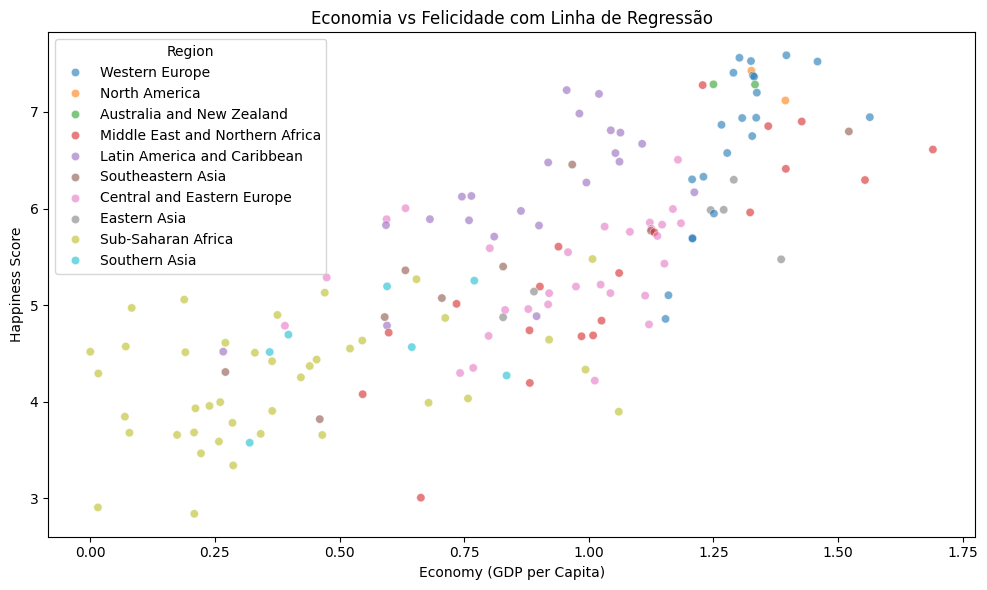

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    hue='Region',
    alpha=0.6   # Transparência dos pontos
)

plt.title('Relação entre Economia e Felicidade')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

Analisando os gráficos de economia x score de felicidade, deu pra perceber que o PIB do país afeta com certeza na felicidade dos seus moradores, porém temos sim vários outliers, o que indica que possam ter outros fatores importantes para a felicidade dos países.

Ex. 3

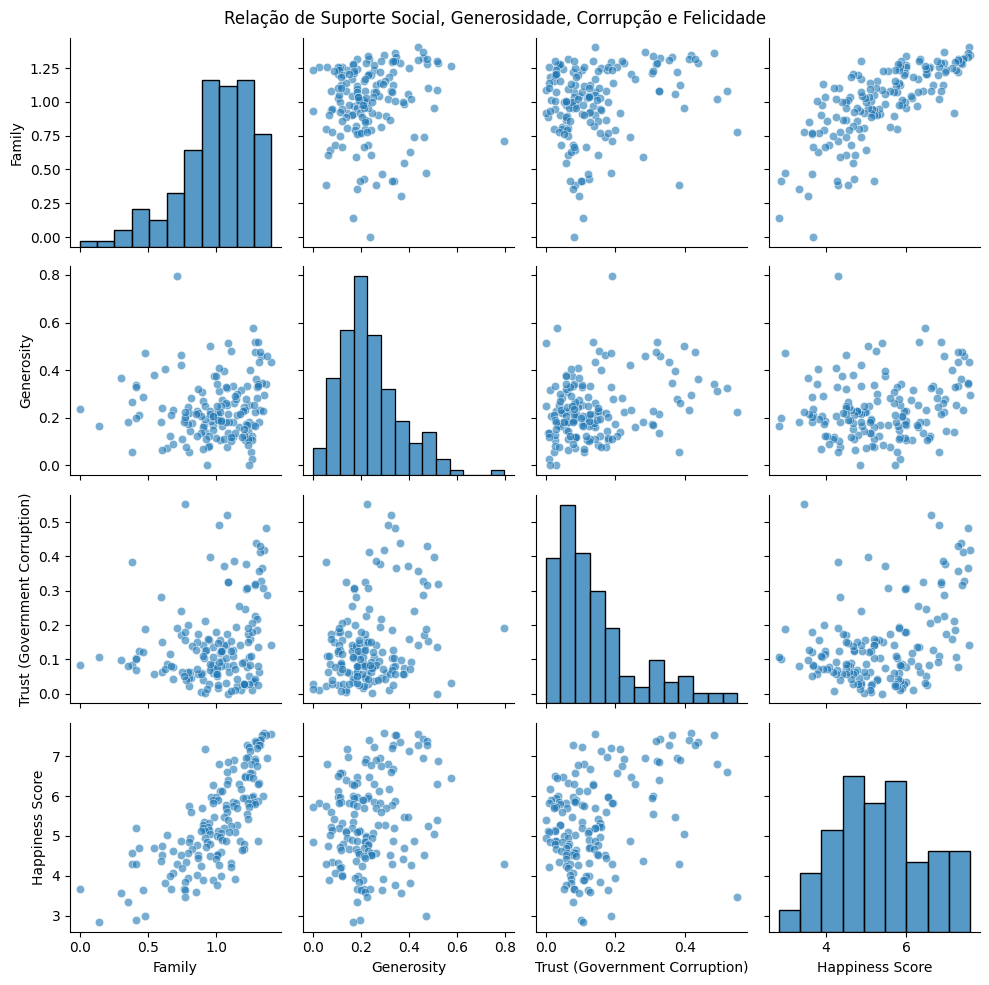

In [ ]:
# Selecionar as colunas de interesse
pairplot_data = df[[
    'Family',
    'Generosity',
    'Trust (Government Corruption)',
    'Happiness Score'
]]

# Criar o pairplot
sns.pairplot(
    pairplot_data,
    plot_kws={'alpha': 0.6}
)

# Mostrar o gráfico
plt.suptitle('Relação de Suporte Social, Generosidade, Corrupção e Felicidade')
plt.tight_layout()
plt.show()

Analisando os gráficos, podemos ver a influencia de cada uma das features comparadas entre si e com o hapiness score, temos tendências em alguns campos, principalmente com a familia, e temos campos com uma certa concentração mas com uma falta de correlação e muitos outliers como a corrupção do país, que tem indices de felicidade tanto altos quanto baixos conforme o índice de corrupção aumenta.

Ex 4

In [ ]:
mundo = gpd.read_file(ne_110m_admin_0_countries (2).shp)

#geo = pd.read_csv('2015.csv')



NameError: name 'ne_110m_admin_0_countries' is not defined